# Case Study: How Does a Bike-Share Navigate Speedy Success?

## Introduction
Welcome to the Cyclistic bike-share analysis case study! In this project, we will help sharing-bicycle company to solve the business problem.

## Problem Statement
Cyclistic bike-share is a company that shares bikes for people using, and has users and stations. The current problem we facing is how to convert the casual users into annual users. To be more detailed, we would like to know the reason why casual user would like to become annual users, and to improve the probability of Cyclistic bike-share.

## Senario
We are a junior data analyst group working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.



### STEP 1 Data cleaning

In [573]:
#import the package
import pandas as pd

In [574]:
#Since the files are seperated by month, we need to combine them together.
#We use the data from 2022-02 to 2022-07
file_name = '20220{}-divvy-tripdata.csv'
df_list = []
for i in range(2, 8):
    df_i = pd.read_csv(file_name.format(i))
    df_i['month']= i
    df_list.append(df_i)

df = pd.concat(df_list)
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2


In [576]:
df=df.reset_index(drop=True)

In [577]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
2998445,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.74,-87.68,41.75,-87.68,member,7
2998446,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.87,-87.66,41.87,-87.68,member,7
2998447,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.95,-87.64,41.95,-87.65,member,7
2998448,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.88,-87.63,41.87,-87.63,member,7
2998449,AA9217C8DA3BAC0B,electric_bike,2022-07-29 13:05:20,2022-07-29 13:10:40,NaN,NaN,NaN,NaN,41.90,-87.66,41.90,-87.67,member,7


In [578]:
df=df.dropna()

In [642]:
## spaeated by week of day
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour,part_of_day,ride_duration
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2,18,5,15
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2,17,5,4
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2,18,5,13
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2,11,3,6
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997500,6394A34ACAA198A6,electric_bike,2022-07-25 11:21:39,2022-07-25 11:23:28,California Ave & Altgeld St,15646,California Ave & Milwaukee Ave,13084,41.926633,-87.697727,41.922695,-87.697153,member,7,11,3,1
2997503,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7,12,4,7
2997559,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,7,7,2,3
2997812,A597A11985C1FEC2,classic_bike,2022-07-10 20:44:11,2022-07-10 20:45:26,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,7,20,6,1


In [579]:
df1 =df
df1['started_at'] = pd.to_datetime(df['started_at'])

df1['ended_at'] = pd.to_datetime(df['ended_at'])

In [580]:
df1['hour'] = df1['started_at'].dt.hour
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2,18
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2,17
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2,18
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2,11
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997500,6394A34ACAA198A6,electric_bike,2022-07-25 11:21:39,2022-07-25 11:23:28,California Ave & Altgeld St,15646,California Ave & Milwaukee Ave,13084,41.926633,-87.697727,41.922695,-87.697153,member,7,11
2997503,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7,12
2997559,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,7,7
2997812,A597A11985C1FEC2,classic_bike,2022-07-10 20:44:11,2022-07-10 20:45:26,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,7,20


In [582]:
## 1:late nught(0~4), 2:earky morning(4~8), 3:morning(8~12), 4:afternoon(12~16), 5:evening(16~20), 6: night(20~24)
df1['part_of_day'] = (df1['started_at'].dt.hour % 24 + 4) // 4
df1['part_of_day'].replace({1: '1',
                      2: '2',
                      3: '3',
                      4: '4',
                      5: '5',
                      6: '6'}, inplace=True)

In [583]:
## To hace the duration of a ride
df1['ride_duration'] = (df1['ended_at'] - df1['started_at'])/pd.Timedelta(minutes=1)
df1['ride_duration'] = df1['ride_duration'].astype('int64')

In [584]:
df1[df1['ride_duration'] < 0].count()

ride_id               14
rideable_type         14
started_at            14
ended_at              14
start_station_name    14
start_station_id      14
end_station_name      14
end_station_id        14
start_lat             14
start_lng             14
end_lat               14
end_lng               14
member_casual         14
month                 14
hour                  14
part_of_day           14
ride_duration         14
dtype: int64

In [585]:
df1[df1['ride_duration'] < 2].count()

ride_id               74512
rideable_type         74512
started_at            74512
ended_at              74512
start_station_name    74512
start_station_id      74512
end_station_name      74512
end_station_id        74512
start_lat             74512
start_lng             74512
end_lat               74512
end_lng               74512
member_casual         74512
month                 74512
hour                  74512
part_of_day           74512
ride_duration         74512
dtype: int64

In [586]:
df1 = df1[df1['ride_duration'] >= 2]
df1 = df1.reset_index()
df1

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour,part_of_day,ride_duration
0,0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2,18,5,15
1,1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2,17,5,4
2,2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2,18,5,13
3,3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2,11,3,6
4,4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268779,2997339,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,member,7,19,5,42
2268780,2997445,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922651,-87.697104,41.903029,-87.697474,member,7,18,5,6
2268781,2997503,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7,12,4,7
2268782,2997559,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,7,7,2,3


In [587]:
df1 = df1.drop(columns=['index'])

In [588]:
df1 = df1[df1['ride_duration'] <= 1000]
df1 = df1.reset_index()
df1 = df1.drop(columns=['index'])
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour,part_of_day,ride_duration
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2,18,5,15
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2,17,5,4
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2,18,5,13
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2,11,3,6
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268187,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,member,7,19,5,42
2268188,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922651,-87.697104,41.903029,-87.697474,member,7,18,5,6
2268189,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7,12,4,7
2268190,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,7,7,2,3


In [589]:
df1 = df1.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,member,2,18,5,15
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,member,2,17,5,4
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,member,2,18,5,13
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,member,2,11,3,6
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,member,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268187,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,member,7,19,5,42
2268188,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,member,7,18,5,6
2268189,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,casual,7,12,4,7
2268190,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,member,7,7,2,3


In [591]:
df1['weekday'] = df1['started_at'].dt.dayofweek
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,member,2,18,5,15,5
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,member,2,17,5,4,6
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,member,2,18,5,13,4
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,member,2,11,3,6,0
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,member,2,5,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268187,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,member,7,19,5,42,0
2268188,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,member,7,18,5,6,0
2268189,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,casual,7,12,4,7,5
2268190,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,member,7,7,2,3,3


In [592]:
df2 = df1.loc[df1['month'].isin([4, 5, 6])]
df2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
294967,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,member,4,17,5,11,2
294968,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,member,4,19,5,20,6
294969,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,member,4,19,5,6,2
294970,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,casual,4,21,6,9,4
294971,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,member,4,15,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646384,F1C4F671FE0FDDD1,electric_bike,2022-06-26 19:50:04,2022-06-26 19:55:23,Clarendon Ave & Junior Ter,13389,Clarendon Ave & Junior Ter,13389,member,6,19,5,5,6
1646385,7B3B2890CA85E05D,classic_bike,2022-06-25 00:56:48,2022-06-25 01:01:39,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,member,6,0,1,4,5
1646386,1E993989CC66BCBC,classic_bike,2022-06-25 00:56:25,2022-06-25 01:00:26,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,member,6,0,1,4,5
1646387,B9F527742959CF03,classic_bike,2022-06-12 13:28:46,2022-06-12 13:53:11,Clark St & Randolph St,TA1305000030,Clark St & Randolph St,TA1305000030,casual,6,13,4,24,6


In [593]:
df_member = df2.loc[df2['member_casual'] == 'member']
df_member

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
294967,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,member,4,17,5,11,2
294968,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,member,4,19,5,20,6
294969,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,member,4,19,5,6,2
294971,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,member,4,15,4,5,5
294972,AA9EB7BD2E1FC128,classic_bike,2022-04-21 16:52:33,2022-04-21 16:56:51,Desplaines St & Randolph St,15535,Canal St & Adams St,13011,member,4,16,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646382,ED7BB4A56EE60673,electric_bike,2022-06-14 07:06:56,2022-06-14 07:11:29,Franklin St & Adams St (Temp),TA1309000008,Clark St & Randolph St,TA1305000030,member,6,7,2,4,1
1646383,BC12300141A81206,classic_bike,2022-06-19 11:53:33,2022-06-19 12:22:46,Blue Island Ave & 18th St,13135,Michigan Ave & Oak St,13042,member,6,11,3,29,6
1646384,F1C4F671FE0FDDD1,electric_bike,2022-06-26 19:50:04,2022-06-26 19:55:23,Clarendon Ave & Junior Ter,13389,Clarendon Ave & Junior Ter,13389,member,6,19,5,5,6
1646385,7B3B2890CA85E05D,classic_bike,2022-06-25 00:56:48,2022-06-25 01:01:39,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,member,6,0,1,4,5


In [594]:
df_member.to_csv('Q2_member_data.csv',index=False)

In [595]:
df_casual = df2.loc[df2['member_casual'] == 'casual']
df_casual

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
294970,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,casual,4,21,6,9,4
294975,F04AF7DB8CE260D1,electric_bike,2022-04-23 15:13:07,2022-04-23 15:26:53,Wentworth Ave & Cermak Rd,13075,Calumet Ave & 18th St,13102,casual,4,15,4,13,5
294977,B975D679769A9E75,classic_bike,2022-04-13 13:49:32,2022-04-13 13:54:44,Halsted St & Polk St,TA1307000121,Halsted St & Maxwell St,TA1309000001,casual,4,13,4,5,2
294978,EA9CBB5AA465E31D,electric_bike,2022-04-02 11:09:51,2022-04-02 11:20:08,Dearborn St & Van Buren St,624,St. Clair St & Erie St,13016,casual,4,11,3,10,5
294986,3D9FA8EB4CE3C521,docked_bike,2022-04-16 00:40:36,2022-04-16 01:35:49,Wabash Ave & Grand Ave,TA1307000117,Canal St & Jackson Blvd,13138,casual,4,0,1,55,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646378,044C69AD133CA722,classic_bike,2022-06-27 19:27:11,2022-06-27 20:09:54,Streeter Dr & Grand Ave,13022,Lincoln Ave & Waveland Ave,13253,casual,6,19,5,42,0
1646379,0F124A0CC380A05F,electric_bike,2022-06-23 19:13:58,2022-06-23 19:40:46,Streeter Dr & Grand Ave,13022,Clarendon Ave & Junior Ter,13389,casual,6,19,5,26,3
1646380,95117AD44654E5F3,classic_bike,2022-06-02 19:21:49,2022-06-02 19:38:21,Streeter Dr & Grand Ave,13022,Clark St & Randolph St,TA1305000030,casual,6,19,5,16,3
1646387,B9F527742959CF03,classic_bike,2022-06-12 13:28:46,2022-06-12 13:53:11,Clark St & Randolph St,TA1305000030,Clark St & Randolph St,TA1305000030,casual,6,13,4,24,6


In [596]:
df_casual.to_csv('Q2_casual_data.csv',index=False)

## Step 2 Analyze Data

In [598]:
df55 = df1.groupby('part_of_day')['member_casual'].value_counts().unstack()
df55.reset_index()

member_casual,part_of_day,casual,member
0,1,39941,26061
1,2,35310,123343
2,3,144733,248390
3,4,269699,292223
4,5,329726,450112
5,6,153779,154875


In [599]:
df55 = df55.reset_index()

In [600]:
df55

member_casual,part_of_day,casual,member
0,1,39941,26061
1,2,35310,123343
2,3,144733,248390
3,4,269699,292223
4,5,329726,450112
5,6,153779,154875


In [601]:
import matplotlib.pyplot as plt

In [602]:
df55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_of_day  6 non-null      object
 1   casual       6 non-null      int64 
 2   member       6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


## Finding
At this place, we noticed that the most frequent period people riding our bikes is in the evening (16-20), and the 2nd period is afernoon(12-16)

<AxesSubplot:xlabel='part_of_day'>

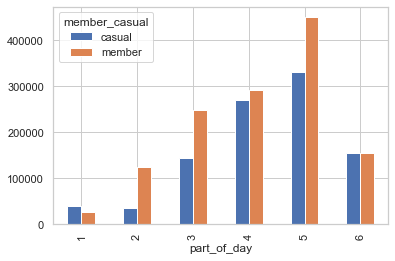

In [603]:
df55.plot(x="part_of_day", y=["casual", "member"], kind="bar")

In [604]:
## We would like to go deeper to see the riding time in each hour
pd.pivot_table(df1,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           18086
            member           12345
1           casual           11317
            member            7300
2           casual            6742
            member            3961
3           casual            3796
            member            2455
4           casual            2479
            member            3029
5           casual            4224
            member           13339
6           casual           10143
            member           36545
7           casual           18464
            member           70430
8           casual           25775
            member           81190
9           casual           28241
            member           54691
10          casual           38712
            member           50860
11          casual           52005
            member           61649
12          casual           61594
            member           70891
13          casual           65120
            member           69694
14          casual           68511
            member           69093
15          casual           74474
            member           82545
16          casual           84175
            member          114153
17          casual           94919
            member          140892
18          casual           84596
            member          113462
19          casual           66036
            member           81605
20          casual           49419
            member           57773
21          casual           41114
            member           43820
22          casual           36625
            member           32430
23          casual           26621
            member           20852
Total Count                2268192

In [605]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Finding
In this graph, we found that there are 2 peak in a day riding, 1st is 17:00, 2nd is 8:00

In [606]:
fig_hour = df1.groupby(['hour', 'member_casual'], as_index=False).count()

fig_hour = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,200000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'Numbers of Rides', 'hour': 'A day', 'member_casual': 'Member/Casual'},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_hour.update_xaxes(dtick=1)
fig_hour.show()

In [624]:
df_duration = df1.groupby('ride_duration')['member_casual'].value_counts().unstack()
df_duration = df_duration.reset_index()
df_duration.head(20)

member_casual,ride_duration,casual,member
0,2,14877.0,60742.0
1,3,24279.0,86379.0
2,4,32472.0,97246.0
3,5,39013.0,97769.0
4,6,42227.0,92914.0
5,7,44834.0,85051.0
6,8,44860.0,77684.0
7,9,43270.0,70713.0
8,10,41935.0,63682.0
9,11,39313.0,55961.0


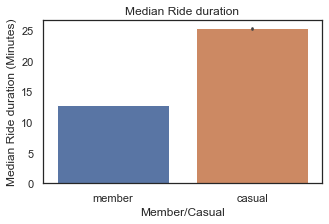

In [632]:
df_duration = df1[['ride_duration', 'member_casual']]
df_dduration = df_duration.groupby(['member_casual'], as_index=False)[['ride_duration']].median()

plt.figure(figsize = (5,3))
sns.barplot(data=df_duration, x='member_casual', y='ride_duration').set_title('Median Ride duration')

plt.xlabel('Member/Casual')
plt.ylabel('Median Ride duration (Minutes)')
plt.show()

# Idea: try to see the type of user in each day

In [558]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,member,2,18,5,15,5
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,member,2,17,5,4,6
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,member,2,18,5,13,4
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,member,2,11,3,6,0
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,member,2,5,2,2,2


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343296 entries, 0 to 2998276
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  month               int64         
 14  hour                int64         
 15  part_of_day         object        
 16  ride_duration       int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(8)
memory usage: 321.8+ MB


In [560]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268192 entries, 0 to 2268191
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   month               int64         
 10  hour                int64         
 11  part_of_day         object        
 12  ride_duration       int64         
 13  weekday             int64         
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage: 242.3+ MB


In [561]:
## To hace the duration of a ride
df1['ride_duration'] = (df1['ended_at'] - df1['started_at'])/pd.Timedelta(minutes=1)
df1['ride_duration'] = df1['ride_duration'].astype('float64')

In [562]:
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,member,2,18,5,15.250000,5
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,member,2,17,5,4.433333,6
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,member,2,18,5,13.633333,4
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,member,2,11,3,6.950000,0
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,member,2,5,2,2.900000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268187,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,member,7,19,5,42.966667,0
2268188,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,member,7,18,5,6.416667,0
2268189,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,casual,7,12,4,7.483333,5
2268190,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,member,7,7,2,3.283333,3


In [563]:
df1.sort_values(by='ride_duration')
## at this place, we found that theis table contains negative value, and we would like to know the reason

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
646376,D9CBED014C10D7D5,classic_bike,2022-05-17 17:26:09,2022-05-17 17:28:09,Wilton Ave & Belmont Ave,TA1307000134,Racine Ave & Belmont Ave,TA1308000019,member,5,17,5,2.000000,1
213066,750CDC3A7656F458,classic_bike,2022-03-03 20:56:43,2022-03-03 20:58:43,Ellis Ave & 58th St,TA1309000011,Ellis Ave & 60th St,KA1503000014,member,3,20,6,2.000000,3
1149455,26F0695962F144AF,classic_bike,2022-06-01 12:44:53,2022-06-01 12:46:53,Greenview Ave & Fullerton Ave,TA1307000001,Southport Ave & Wrightwood Ave,TA1307000113,member,6,12,4,2.000000,2
106676,DCB249075BB678E4,electric_bike,2022-03-04 18:13:08,2022-03-04 18:15:08,Desplaines St & Kinzie St,TA1306000003,Clinton St & Lake St,13021,member,3,18,5,2.000000,4
1779979,231FCB43D69FCED7,electric_bike,2022-07-16 19:28:22,2022-07-16 19:30:22,Broadway & Granville Ave,15571,Broadway & Granville Ave,15571,member,7,19,5,2.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185286,3EDE7B991DCD0B95,docked_bike,2022-03-05 19:07:56,2022-03-06 11:46:22,Millennium Park,13008,Streeter Dr & Grand Ave,13022,casual,3,19,5,998.433333,5
294371,BB2DB34879D374DA,docked_bike,2022-03-20 16:49:20,2022-03-21 09:28:06,DuSable Lake Shore Dr & Monroe St,13300,Streeter Dr & Grand Ave,13022,casual,3,16,5,998.766667,6
850260,CD8836E1E1C11239,classic_bike,2022-05-08 15:26:10,2022-05-09 08:05:03,Streeter Dr & Grand Ave,13022,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,casual,5,15,4,998.883333,6
1254951,F4BCF948BBD0C717,classic_bike,2022-06-14 21:33:14,2022-06-15 14:13:26,Lake Park Ave & 35th St,KA1503000004,Calumet Ave & 35th St,13345,casual,6,21,6,1000.200000,1


In [564]:
df1[df1['ride_duration'] < 2].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
month                 0
hour                  0
part_of_day           0
ride_duration         0
weekday               0
dtype: int64

In [565]:
df1 = df1[df1['ride_duration'] >= 2]
df1 = df1.reset_index()
df1 = df1.drop(columns=['index'])
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,hour,part_of_day,ride_duration,weekday
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,member,2,18,5,15.250000,5
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,member,2,17,5,4.433333,6
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,member,2,18,5,13.633333,4
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,member,2,11,3,6.950000,0
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,member,2,5,2,2.900000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268187,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,member,7,19,5,42.966667,0
2268188,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,member,7,18,5,6.416667,0
2268189,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,casual,7,12,4,7.483333,5
2268190,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,member,7,7,2,3.283333,3


In [566]:
dfff = df1.groupby('part_of_day')['member_casual'].value_counts().unstack()
dfff.reset_index()


member_casual,part_of_day,casual,member
0,1,39941,26061
1,2,35310,123343
2,3,144733,248390
3,4,269699,292223
4,5,329726,450112
5,6,153779,154875


In [477]:
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour,part_of_day,ride_duration
0,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.884621,-87.627834,41.915689,-87.634600,member,2,18,5,15.250000
1,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.929143,-87.649077,41.928773,-87.663913,member,2,17,5,4.433333
2,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.884621,-87.627834,41.879255,-87.639904,member,2,18,5,13.633333
3,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.948150,-87.663940,41.952833,-87.649993,member,2,11,3,6.950000
4,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.884621,-87.627834,41.885837,-87.635500,member,2,5,2,2.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268779,D560369D80AB76C9,classic_bike,2022-07-18 19:23:21,2022-07-18 20:06:19,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,member,7,19,5,42.966667
2268780,A415F273B2963D34,electric_bike,2022-07-04 18:36:02,2022-07-04 18:42:27,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922651,-87.697104,41.903029,-87.697474,member,7,18,5,6.416667
2268781,3276F1017BD0CFA6,electric_bike,2022-07-23 12:42:19,2022-07-23 12:49:48,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual,7,12,4,7.483333
2268782,B0FD149163D58D01,classic_bike,2022-07-21 07:28:01,2022-07-21 07:31:18,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892394,-87.676885,41.895634,-87.672069,member,7,7,2,3.283333


## Finding
There is no member using the docked_bike, and we like to know the reason.

In [631]:
## To see the pivot table of member_casual and type of ride
rt_pivot = pd.pivot_table(df1, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          528301
              member          889450
docked_bike   casual          106864
electric_bike casual          338023
              member          405554
total count                  2268192

In [636]:
df_wod = df1.groupby('weekday')['member_casual'].value_counts().unstack()
df_wod.reset_index()
df_wod

member_casual,casual,member
weekday,,
0,120097,184728
1,105256,202700
2,104935,196789
3,124857,204086
4,126178,172080
5,206571,172805
6,185294,161816


In [641]:
fig_weekday = df1.groupby(['weekday', 'member_casual'], as_index=False).count()

fig_weekday = px.line(fig_weekday, x = 'weekday', y = 'ride_id',
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'Numbers of Rides', 'hour': 'A day', 'member_casual': 'Member/Casual'},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_weekday.update_xaxes(dtick=1)
fig_weekday.show()